In [1]:
import json
import pandas as pd
import glob
import time
from tqdm import tqdm
import sys,os
import collections
import re
import csv
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import itertools
import numpy as np
import statistics

In [2]:
pd.options.display.max_columns = None

In [3]:
# folder = 'csv_he'
# folder = 'csv_pp_500'
folder = 'csv_b_500'
# selection_method = 1
selection_method = 2

In [4]:
df_users = pd.read_csv(folder + '/df_users_metrics_' + str(selection_method) + '.csv')
df_pageviews = pd.read_csv(folder + '/df_pageviews_metrics_' + str(selection_method) + '.csv')
df_click = pd.read_csv(folder + '/df_click_all.csv')

In [15]:
df_users['number_of_week'] = '-'
df_users['date'] = '-'

In [16]:
# df_users['datum'] = df_users.apply(lambda x: datetime.strptime(df_users['day'].values[0], "%Y-%m-%d"))
df_users['date'] = pd.to_datetime(df_users['day'], format= "%Y-%m-%d")
df_users['date'] = [x.date() for x in df_users.date]
df_users['number_of_week'] = [x.isocalendar()[1] for x in df_users.date]
df_users['month'] = [x.month for x in df_users.date]

In [17]:
# df_users[(df_users['buy'] == 1) & (df_users['number_of_week'] == 25)][['day', 'number_of_week', 'date']]

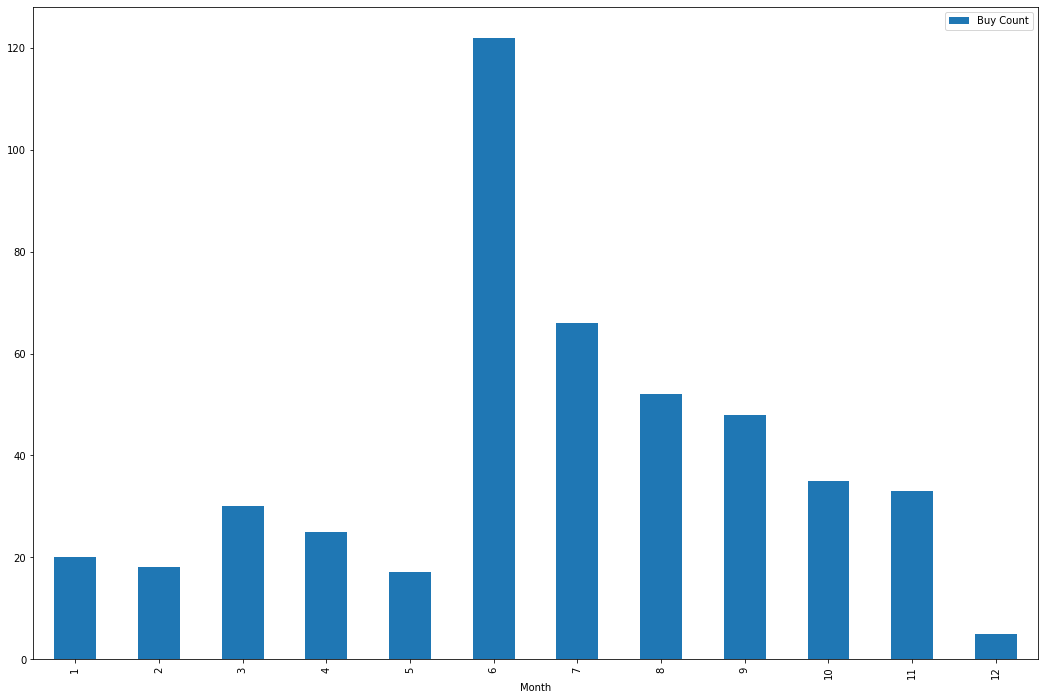

In [18]:
dfg = df_users[(df_users['buy'] == 1) & (df_users['date'] > datetime.date(2020,6,2))]['month'].value_counts().sort_index()
dfg = dfg.to_frame().reset_index()
dfg.rename(columns={'index' : 'Month', "month" : "Buy Count"}, inplace = True)
dfg.plot(kind='bar', x ='Month', y = "Buy Count", figsize=(18,12))

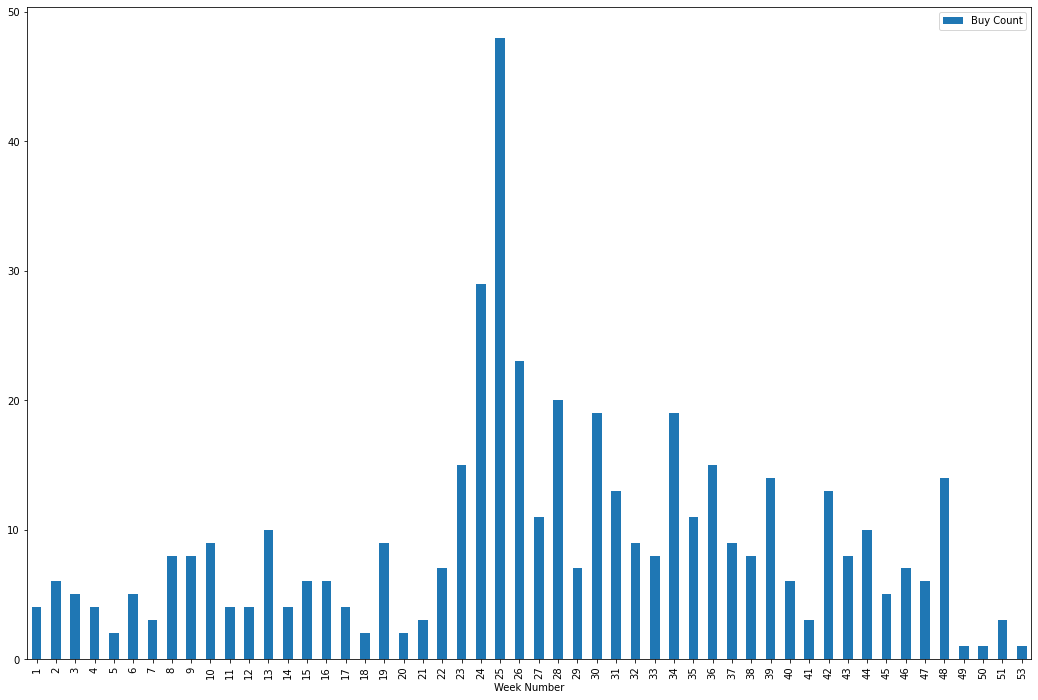

In [11]:
dfg = df_users[(df_users['buy'] == 1) & (df_users['datum'] > datetime.date(2020,6,2))]['number_of_week'].value_counts().sort_index()
dfg = dfg.to_frame().reset_index()
dfg.rename(columns={'index' : 'Week Number', "number_of_week" : "Buy Count"}, inplace = True)
dfg.plot(kind='bar', x ='Week Number', y = "Buy Count", figsize=(18,12))

In [ ]:
# 1. remove device type != desktop, mobile or tablet
# 2. join os.name
# 3. join browser.name
# 4. join referrer
# 5. average time user spent in store - effective duration mean groupby user
# 6. avg count of user purchases
# 7. avg count of pageviews visited

In [ ]:
# device type 
df_users = df_users[(df_users['device.type'] == 'desktop') | (df_users['device.type'] == 'mobile') | (df_users['device.type'] == 'tablet')]

In [ ]:
# os.name
os_names = [
    'Android',
    'Windows',
    'iOS',
    'Linux'
]
os_linux = [
    'Ubuntu',
    'webOS',
    'Fedora'
]
df_users.loc[df_users['os.name'] == 'OS X', 'os.name'] = 'iOS'
df_users.loc[df_users['os.name'].isin(os_linux), 'os.name'] = 'Linux'
df_users.loc[df_users['os.name'] == 'Chrome OS', 'os.name'] = 'Android'
df_users.loc[~df_users['os.name'].isin(os_names), 'os.name'] = '-'

In [ ]:
# os types
counter = collections.Counter(df_users['os.name'])
print(counter)

labels = counter.keys()
sizes = counter.values()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, labels=labels, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')

plt.show()

In [ ]:
# browser.name
browser_names = [
    'Chrome',
    'Safari',
    'Facebook',
    'Firefox',
    'Edge',
    'Opera',
    'MIUI Browser'
]
browser_chrome = [
    'Google Search',
    'Chromium'
]
browser_firefox = [
    'Firefox Mobile',
]
browser_facebook = [
    'Instagram',
    'Facebook Messenger'
]
browser_opera = [
    'Opera Mobile',
    'Opera Mini'
]
df_users.loc[df_users['browser.name'].isin(browser_chrome), 'browser.name'] = 'Chrome'
df_users.loc[df_users['browser.name'].isin(browser_firefox), 'browser.name'] = 'Firefox'
df_users.loc[df_users['browser.name'].isin(browser_facebook), 'browser.name'] = 'Facebook'
df_users.loc[df_users['browser.name'].isin(browser_opera), 'browser.name'] = 'Opera'
df_users.loc[~df_users['browser.name'].isin(browser_names), 'browser.name'] = '-'

In [ ]:
counter=collections.Counter(df_users['browser.name'])
print(counter)

labels = counter.keys()
sizes = counter.values()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, labels=labels, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')

plt.show()

In [ ]:
df_users['referrer1'].unique()

In [ ]:
len(df_users['referrer1'].unique())

In [ ]:
# referrers
if folder == 'csv_he':
    referrers = [
        'google',
        'facebook',
        'herbatica',
        'nasezdravie',
        'instagram',
        'heureka',
        'azet',
        'bing',
        'zoznam',
        'seznam'
    ]
    
if (folder == 'csv_pp') or (folder == 'csv_pp_500'):
    referrers = [
        'google',
        'facebook',
        'particlepeptides',
        'instagram',
        'azet',
        'bing',
        'zoznam',
        'seznam',
        'centrum'
    ]

if (folder == 'csv_b_500'):
    referrers = [
        'google',
        'facebook',
        'barefootky',
        'instagram',
        'azet',
        'bing',
        'modrykonik',
        'centrum',
        'tatrabanka'
    ]
    
for referrer in referrers:
    df_users.loc[df_users['referrer1'].str.contains(referrer), 'referrer1'] = referrer

df_users.loc[~df_users['referrer1'].isin(referrers), 'referrer1'] = '-'

In [ ]:
counter=collections.Counter(df_users['referrer1'])
print(counter)

labels = counter.keys()
sizes = counter.values()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, labels=labels, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')

plt.show()

In [ ]:
# average time user spent in store
user_mean_eff_duration = df_users.groupby('user_id')['effective_duration'].agg('mean').reset_index()
user_mean_eff_duration = user_mean_eff_duration.rename(columns={'effective_duration': 'user_mean_eff_duration'})

In [ ]:
df_users = pd.merge(
    df_users,
    user_mean_eff_duration,
    on='user_id',
    how='left'
)

In [ ]:
# average time user spent in store on product pageviews
df_pageviews_product = df_pageviews[df_pageviews['pageview_product'] == True][['session_id', 'effective_duration']] # chcem len produktove pageviews

In [ ]:
pv_product_mean_eff_duration = df_pageviews_product.groupby('session_id')['effective_duration'].agg('mean').reset_index()
pv_product_mean_eff_duration = pv_product_mean_eff_duration.rename(columns={'effective_duration': 'pv_product_mean_eff_duration'})

In [ ]:
df_users = pd.merge(
    df_users,
    pv_product_mean_eff_duration,
    on='session_id',
    how='left'
)

In [ ]:
df_users['pv_product_mean_eff_duration'] = round(df_users['pv_product_mean_eff_duration'])

In [ ]:
df_users['pv_product_mean_eff_duration'] = df_users['pv_product_mean_eff_duration'].fillna(0)
df_users['pv_product_mean_eff_duration'] = df_users['pv_product_mean_eff_duration'].astype(int)

In [ ]:
# avg buy count on user
df_users['buy_count'].sum() / len(df_users[df_users['buy_count'] > 0])

In [ ]:
# users that purchase >= 2/ users that purchase once
counter = collections.Counter(df_users.groupby('user_id')['buy_count'].mean())
percentage = round((sum(counter.values()) - counter[1]) / counter[1] * 100, 2)
print('Users that purchase >= 2/ users that purchase once: ' + str(percentage) + ' %')

In [ ]:
# users that purchase >= 2
(sum(counter.values()) - counter[1]) / sum(counter.values()) 

In [ ]:
counter = collections.Counter(df_users.groupby('user_id')['buy_count'].mean())
print(counter)

labels = counter.keys()
sizes = counter.values()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, labels=labels, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counter.keys(),counter.values())
plt.show()

In [ ]:
# avg number of pageviews visited
df_users['n_pageviews'].mean()

In [ ]:
# avg number of pageviews visited for each user
df_users.groupby('user_id')['n_pageviews'].agg('sum').reset_index()

In [ ]:
# Počty
print('Number of continents: ' + str(len(set(df_users['continent']))))
print('Number of countries: ' + str(len(set(df_users['country']))))
print('Number of regions: ' + str(len(set(df_users['region']))))
print('Number of cities: ' + str(len(set(df_users['city']))))
print('Number of device types: ' + str(len(set(df_users['device.type']))))
print('Number of os: ' + str(len(set(df_users['os.name']))))
print('Number of browsers: ' + str(len(set(df_users['browser.name']))))
print('Number of referrers: ' + str(len(set(df_users['referrer1']))))

In [ ]:
# buy hour
counter=collections.Counter(df_users['hour'])
print(counter)

labels = counter.keys()
sizes = counter.values()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, labels=labels, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')

plt.show()

In [ ]:
plt.boxplot(df_users['effective_duration'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
arr1=df_users['effective_duration']
# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


In [ ]:
outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

In [ ]:
# boxplot of data within the whisker
arr2 = arr1[(arr1 >= lower_bound) & (arr1 <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()

In [ ]:
df_users.to_csv(folder + '/df_users_metrics_clean_' + str(selection_method) + '.csv', index=False, encoding='utf-8-sig')